In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin

from typing_extensions import Self

In [2]:
surname = "Боровой"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 55,  1, 44, 26, 18, 3, 38, 26, 18, 12,  3, 49, 45,
        7, 42, 9,  4,  3, 36, 33, 31, 29,  5, 4,  4, 19, 21, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задание № 2. Вариант: ", variant % 2 + 1)
print("Задание № 3. Вариант: ", variant % 3 + 1 )

Задание № 2. Вариант:  1
Задание № 3. Вариант:  2


<h1> Задача 1. Реализация собственных классов и функций <h1>

In [3]:
df = pd.read_csv("regularization.csv")

In [4]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,3.856603,14.873388,57.360757,221.217682,853.148822,3290.256492,1.268921e+04,4.893726e+04,1.887316e+05,7.278629e+05,2.807078e+06,1.082579e+07,4.175077e+07,1.610161e+08,6.209754e+08,2.394856e+09,9.209759
1,0.103760,0.010766,0.001117,0.000116,0.000012,0.000001,1.294799e-07,1.343480e-08,1.393992e-09,1.446402e-10,1.500783e-11,1.557209e-12,1.615756e-13,1.676504e-14,1.739537e-15,1.804939e-16,10.409240
2,3.168241,10.037752,31.802020,100.756468,319.220791,1011.368453,3.204259e+03,1.015187e+04,3.216356e+04,1.019019e+05,3.228498e+05,1.022866e+06,3.240687e+06,1.026728e+07,3.252921e+07,1.030604e+08,7.643742
3,3.744019,14.017681,52.482471,196.495391,735.682558,2754.409777,1.031256e+04,3.861044e+04,1.445582e+05,5.412288e+05,2.026371e+06,7.586773e+06,2.840503e+07,1.063490e+08,3.981726e+08,1.490766e+09,8.453341
4,2.492535,6.212731,15.485450,38.598027,96.206935,239.799159,5.977078e+02,1.489808e+03,3.713398e+03,9.255774e+03,2.307034e+04,5.750364e+04,1.433298e+05,3.572546e+05,8.904697e+05,2.219527e+06,9.317824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.403960,19.394866,85.414221,376.160841,1656.597410,7295.589233,3.212949e+04,1.414970e+05,6.231471e+05,2.744315e+06,1.208585e+07,5.322562e+07,2.344035e+08,1.032304e+09,4.546225e+09,2.002139e+10,9.510032
296,3.004771,9.028649,27.129023,81.516502,244.938425,735.983886,2.211463e+03,6.644940e+03,1.996652e+04,5.999483e+04,1.802707e+05,5.416723e+05,1.627601e+06,4.890569e+06,1.469504e+07,4.415523e+07,8.615320
297,3.226139,10.407971,33.577559,108.325862,349.474260,1127.452444,3.637318e+03,1.173449e+04,3.785710e+04,1.221323e+05,3.940156e+05,1.271149e+06,4.100903e+06,1.323008e+07,4.268208e+07,1.376983e+08,8.320160
298,0.283141,0.080169,0.022699,0.006427,0.001820,0.000515,1.458880e-04,4.130687e-05,1.169567e-05,3.311523e-06,9.376281e-07,2.654810e-07,7.516855e-08,2.128330e-08,6.026175e-09,1.706257e-09,10.217886


In [5]:
class MyLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, intercept = True, alpha = 0.0):
        '''
        Инициализация класса собсвтенной линейной регрессии
        
        alpha: коэффицент регуляризации
        intercept: флаг наличия свободного члена
        '''
        
        self.alpha = alpha
        self.intercept = intercept
        #self.lr = learning_rate
        #self.n_iters = n_iters
        
    def fit(self, X, y) -> Self:
        
        '''
        Реализация функции fit
        
        X: значение(я) фичей
        y: значение target
        '''
        # n_samples - количество строк, f_samples - количество фичей (столбцов)
        n_samples, f_samples = X.shape
        
        X_temp = X 
        y_temp = y
        
        # добавляем столбик с единичками если есть флаг наличия свободного члена
        if self.intercept:
            X_temp =  np.hstack((X_temp, np.ones((n_samples, 1))))
        
        # если есть коээф. регуляризации добавляем ее (значение нормализации домножаем на матрицу, в которой по диагонали единицы)
        if self.alpha:
            #print("alpha flag commited")
            if self.intercept: # если есть флаг свободного члена то размер столбцов Х будет на 1 больше
                regular_matrix = np.eye(f_samples + 1)
            else:
                regular_matrix = np.eye(f_samples)
            regular_matrix[-1, -1] = 0 # не регуляризируем bias
            # решение линейной системы уравнений для нахождения коэффициентов в линейной регрессии с регуляризацией
            self.coeficents = np.linalg.solve(X_temp.T @ X_temp + self.alpha * regular_matrix, X_temp.T @ y_temp) 
        else:
            self.coeficents = np.linalg.lstsq(X_temp, y_temp, rcond=None)[0]
        
        return self
    
    def predict(self, X):
        
        '''
        Функция предсказания результата линейной регрессии. 
        Если есть флаг intercept, то проводим эту операцию с тестовыми данными.
        
        X: тестовые данные (X_test)
        '''
        
        # Проверяем что модель была построена
        if self.coeficents is None:
            raise ValueError("Model is not fitted yet. Call 'fit' before 'predict'.")
            
        X_temp = X
        n_samples, f_samples = X.shape
        
        # добавляем столбик с единичками если есть флаг наличия свободного члена
        if self.intercept:
            X_temp =  np.hstack((X_temp, np.ones((n_samples, 1))))
            
        predicitons = X_temp @ self.coeficents
        
        return predicitons
    
    @property
    def get_coeficients(self):
        '''
            Возвращаем значения коэфицентов
        '''
        return self.coeficents
        

In [6]:
def my_train_test_split(X, y, test_size = 0.2, random_state = 0):
    
    '''
    Функция разбиения данных на части для тренировки и валидации модели.
    
    X: массив фичей
    y: массив target
    test_size: соотношение разбиения данных (например при значении 0.2 в датафрейме 
        из 100 записей количество тренировочных данных = 80, валидационных = 20)
    random_state: seed для перемешивания данных в случайном порядке
    '''
    
    if random_state is not None:
        np.random.seed(random_state)
    
    # Определяем количество образцов
    n_samples = len(X)
    
    # Вычисляем количество тестовых образцов
    if isinstance(test_size, float):
        n_test_samples = int(n_samples * test_size)
    elif isinstance(test_size, int):
        n_test_samples = test_size
    else:
        raise ValueError("test_size должен быть float или int")
    
    # Создаем индексы
    indices = np.arange(n_samples)
    
    # Перемешиваем индексы, если random_state != 0
    if random_state != 0:
        np.random.shuffle(indices)
    
    # Разделяем индексы на обучающие и тестовые
    test_indices = indices[:n_test_samples]
    train_indices = indices[n_test_samples:]
    #print(train_indices)
    # Формируем обучающие и тестовые наборы
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

In [7]:
def mean_squared_error(y_real, y_pred):
    '''
    Функция вычисления mse(mean squared errror)
    
    y_real: действительные значения y
    y_pred: предсказанные значения y
    '''
    return np.mean((y_real - y_pred) ** 2)

In [8]:
def r2(y_real, y_pred):
    
    '''
    Функция вычисления r2(коэфицента детерминации)
    
    y_real: действительные значения y
    y_pred: предсказанные значения y
    '''
    
     # Вычисляем среднее значение истинных значений
    y_mean = np.mean(y_real)
    
    # Вычисляем сумму квадратов отклонений от среднего (total sum of squares)
    total_sum_of_squares = np.sum((y_real - y_mean) ** 2)
    
    # Вычисляем сумму квадратов остатков (residual sum of squares)
    residual_sum_of_squares = np.sum((y_real - y_pred) ** 2)
    
    # Вычисляем R^2
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    
    return r2

<h1> Протестируем функции на соответсвие функциям из sklearn<h1>

In [9]:
np.random.seed(42)  # Для воспроизводимости
n_samples = 100
n_features = 1

# Генерация случайных данных
X = 2 * np.random.rand(n_samples, n_features)
# Настоящие коэффициенты линейной зависимости
true_slope = 3.5
true_intercept = 1.2
# Добавление случайного шума
y = true_slope * X + true_intercept + np.random.randn(n_samples, n_features)

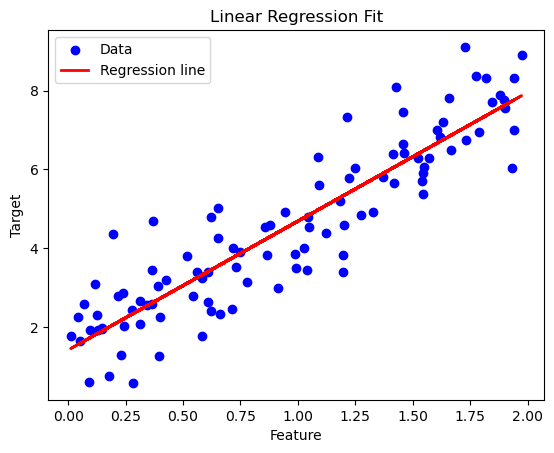

In [10]:
lin = MyLinearRegression()



lin.fit(X, y)


y_pred = lin.predict(X)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

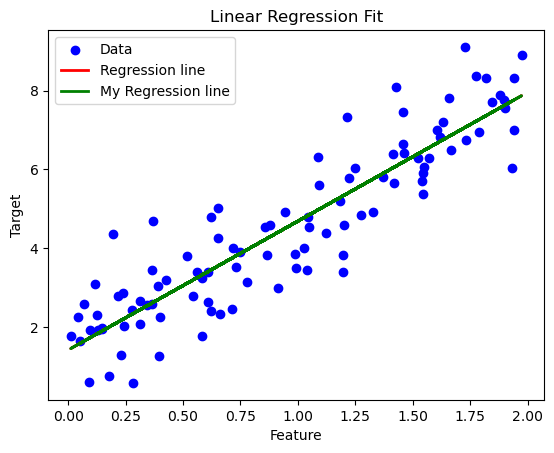

In [12]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression line')
plt.plot(X, y_pred, color='green', linewidth=2, label='My Regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [13]:
model.coef_

array([[3.27011339]])

In [14]:
model.intercept_

array([1.41509616])

In [15]:
lin.get_coeficients

array([[3.27011339],
       [1.41509616]])

<h1> Коэфиценты совпадают <h1>

<h1> Задача 1.2 - Реализуйте класс для стандартизации признаков в виде трансформации совместимый с sklearn. <h1>

In [16]:
class MyStandartizer():
    def __init__(self, has_bias = False, apply_mean = True):
        
        '''
        Инициализация класса собственной стандтартизации
        
        has_bias: содержат ли данные bias (массив единиц)
        apply_mean: флаг среднего
        '''
        
        self.has_bias = has_bias
        self.apply_mean = apply_mean
        
    def fit(self, X, y = None): # y = Nopne для избежания ошибок в пайплайне
        
        '''
        Реализации функции fit
        
        X: массив фичей
        y: массив таргета (всегда none)
        '''
        
        X_temp = X
        
        # не нормализируем bias
        if self.has_bias:
            X_temp = np.delete(X_temp, -1, axis=1)
            
        self.X_mean = X_temp.mean(axis = 0)
        self.X_std = X_temp.std(axis = 0)
        
        return self
    
    def transform(self, X, y = None):
        
        '''
        Реализация функции transform
        
        X: массив фичей
        y: массив таргета (всегда none)
        '''
        
        X = (X - self.X_mean) / self.X_std if self.apply_mean else X / self.X_std
        return X

<h1> Задача 1.3 - Реализуйте функции для расчета MSE и R^2 при отложенной выборке (run_holdout) и кросс-валидации (run_cross_val).<h1>

In [17]:
def run_holdout(model, X, y, train_size, random_state) -> dict:
    
    '''
    Реализация функции отложенной выборки.
    
    X: массив фичей
    y: массив таргета
    train_size: размер обучающего среза данных (для функции my_train_test_split)
    random_state: seed для перемешивания данных в случайном порядке (для функции my_train_test_split)
    '''
    
    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size = 1 - train_size, random_state = random_state)
    
    # Обучаем модель на обучающей выборке
    model.fit(X_train, y_train)
    
    # Предсказываем значения на тестовой выборке
    y_train_pred = model.predict(X_train)
    
    # Предсказываем значения на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Возвращаем результаты в виде словаря
    scores = {
        'mean_squared_error_train': mean_squared_error(y_train, y_train_pred),
        'r2_score_train': r2(y_train, y_train_pred),
        'mean_squared_error_test': mean_squared_error(y_test, y_pred),
        'r2_score_test': r2(y_test, y_pred)
    }
    
    return scores

In [18]:
from sklearn.model_selection import KFold

def run_cross_val(model, X, y, n_splits, shuffle, random_state) -> dict:
    
    '''
    Реализация функции кросс-валидации
    
    X: массив фичей
    y: массив таргета
    n-splits: количество разбиений
    shuffle: присутствие параметра перемешивания
    random_state: seed для перемешивания данных в случайном порядке (для функции KFold)
    '''
    
    kfold = KFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
    
    scores = {
        'train': {'mse': [], 'r2': []},
        'test': {'mse': [], 'r2': []}
    }
    
    for train_index, test_index in kfold.split(X):
        
        # Разделяем данные на обучающую и тестовую выборки
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Обучаем модель на обучающей выборке
        model.fit(X_train, y_train)
        
         # Предсказываем значения на тестовой выборке
        y_train_pred = model.predict(X_train)
    
        # Предсказываем значения на тестовой выборке
        y_pred = model.predict(X_test)

        # обучающие
        scores['train']['mse'].append(mean_squared_error(y_train, y_train_pred))
        scores['train']['r2'].append(r2(y_train, y_train_pred))

        # test
        scores['test']['mse'].append(mean_squared_error(y_test, y_pred))
        scores['test']['r2'].append(r2(y_test, y_pred))
        
    for key in scores.keys():
        for second_key in scores[key].keys():
            scores[key][second_key] = np.mean(scores[key][second_key])
    
    return scores

<h1> Используя класс Pipeline, выполнить обучение линейной регрессии с предварительной стандартизацией с коэффициентом регуляризации равным 0 и 0.01. Выведите значения параметров обученной модели. <h1>

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
X = df.drop("Y", axis = 1)
y = df["Y"]

In [21]:
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
75,0.215487,0.046435,0.010006,0.002156,0.000465,0.000100,0.000022,0.000005,0.000001,2.158770e-07,4.651864e-08,1.002415e-08,2.160072e-09,4.654670e-10,1.003020e-10,2.161375e-11
76,4.399576,19.356268,85.159369,374.665105,1648.367558,7252.118138,31906.243984,140373.941217,617585.804918,2.717116e+06,1.195416e+07,5.259322e+07,2.313879e+08,1.018008e+09,4.478805e+09,1.970484e+10
77,3.816203,14.563405,55.576908,212.092761,809.389016,3088.792739,11787.459920,44983.339152,171665.550931,6.551106e+05,2.500035e+06,9.540641e+06,3.640902e+07,1.389442e+08,5.302393e+08,2.023501e+09
78,4.390483,19.276343,84.632460,371.577394,1631.404309,7162.653235,31447.508792,138069.759462,606192.961226,2.661480e+06,1.168518e+07,5.130360e+07,2.252476e+08,9.889458e+08,4.341950e+09,1.906326e+10
79,2.087546,4.357847,9.097205,18.990832,39.644229,82.759141,172.763491,360.651685,752.876881,1.571665e+03,3.280922e+03,6.849075e+03,1.429776e+04,2.984722e+04,6.230744e+04,1.300696e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.403960,19.394866,85.414221,376.160841,1656.597410,7295.589233,32129.485371,141496.978131,623147.074693,2.744315e+06,1.208585e+07,5.322562e+07,2.344035e+08,1.032304e+09,4.546225e+09,2.002139e+10
296,3.004771,9.028649,27.129023,81.516502,244.938425,735.983886,2211.463065,6644.940165,19966.523744,5.999483e+04,1.802707e+05,5.416723e+05,1.627601e+06,4.890569e+06,1.469504e+07,4.415523e+07
297,3.226139,10.407971,33.577559,108.325862,349.474260,1127.452444,3637.317993,11734.492446,37857.100539,1.221323e+05,3.940156e+05,1.271149e+06,4.100903e+06,1.323008e+07,4.268208e+07,1.376983e+08
298,0.283141,0.080169,0.022699,0.006427,0.001820,0.000515,0.000146,0.000041,0.000012,3.311523e-06,9.376281e-07,2.654810e-07,7.516855e-08,2.128330e-08,6.026175e-09,1.706257e-09


In [23]:
pipeline = Pipeline([
    ('scaler', MyStandartizer()),
    ('lin_regression', MyLinearRegression(alpha = 0.0))
]).fit(X_train, y_train)

In [24]:
pipeline.named_steps['lin_regression'].coeficents

array([-7.03399992e+01,  3.38933177e+03, -7.59465122e+04,  9.95806614e+05,
       -8.49081344e+06,  5.00471524e+07, -2.11702779e+08,  6.57450212e+08,
       -1.51753919e+09,  2.61314568e+09, -3.34059010e+09,  3.12293376e+09,
       -2.07229726e+09,  9.23795008e+08, -2.47940527e+08,  3.02656879e+07,
        9.44535752e+00])

In [25]:
pipeline2 = Pipeline([
    ('scaler', MyStandartizer()),
    ('lin_regression', MyLinearRegression(alpha = 0.01))
]).fit(X_train, y_train)

In [26]:
pipeline2.named_steps['lin_regression'].coeficents

array([ 0.94979207, -2.50344841, -2.17770005,  0.62165696,  1.96406256,
        1.77566798,  0.93923531,  0.1052866 , -0.44994373, -0.69176121,
       -0.69058685, -0.5374222 , -0.30412649, -0.0312441 ,  0.27030082,
        0.6120754 ,  9.44535769])

<h1> Коэфиценты стали меньше, следовательно регуляризация сработала. При меньших коэфицентах модель менее склонна к переобучению и более устойчива <h1>

In [27]:
metrics = pd.DataFrame(columns = ["mse_train", "r2_train", "mse_test", "r2_test"],
                      index = ["holdout alpha = 0", "cross val alpha = 0", "holdout alpha = 0.01", "cross val alpha = 0.01"])

scores = run_holdout(pipeline, X, y, train_size = 0.75, random_state = 0)
mse_tr = scores['mean_squared_error_train']
r2_tr = scores['r2_score_train']
mse_ts = scores['mean_squared_error_test']
r2_ts = scores['r2_score_test']
hld_alpha0 = [mse_tr, r2_tr, mse_ts, r2_ts]
metrics.iloc[0, :] = hld_alpha0

scores = run_cross_val(pipeline, X, y, n_splits = 4, shuffle = True, random_state = 0)
mse_tr = scores['train']['mse']
r2_tr = scores['train']['r2']
mse_ts = scores['test']['mse']
r2_ts = scores['test']['r2']
crv_alpha0 = [mse_tr, r2_tr, mse_ts, r2_ts]
metrics.iloc[1, :] = crv_alpha0

scores = run_holdout(pipeline2, X, y, train_size = 0.75, random_state = 0)
mse_tr = scores['mean_squared_error_train']
r2_tr = scores['r2_score_train']
mse_ts = scores['mean_squared_error_test']
r2_ts = scores['r2_score_test']
hld_alpha001 = [mse_tr, r2_tr, mse_ts, r2_ts]
metrics.iloc[2, :] = hld_alpha001

scores = run_cross_val(pipeline2, X, y, n_splits = 4, shuffle = True, random_state = 0)
mse_tr = scores['train']['mse']
r2_tr = scores['train']['r2']
mse_ts = scores['test']['mse']
r2_ts = scores['test']['r2']
crv_alpha001 = [mse_tr, r2_tr, mse_ts, r2_ts]
metrics.iloc[3, :] = crv_alpha001


metrics

,mse_train,r2_train,mse_test,r2_test
holdout alpha = 0,0.230671,0.678874,0.212675,0.710012
cross val alpha = 0,0.211248,0.707264,0.253536,0.647141
holdout alpha = 0.01,0.243032,0.661666,0.176896,0.758796
cross val alpha = 0.01,0.223489,0.690313,0.236503,0.670613


<h1> У модели с регуляризацией 0.01 метрики немного лучше, следовательно регуляризация приводит к лучшим результатам<h1>

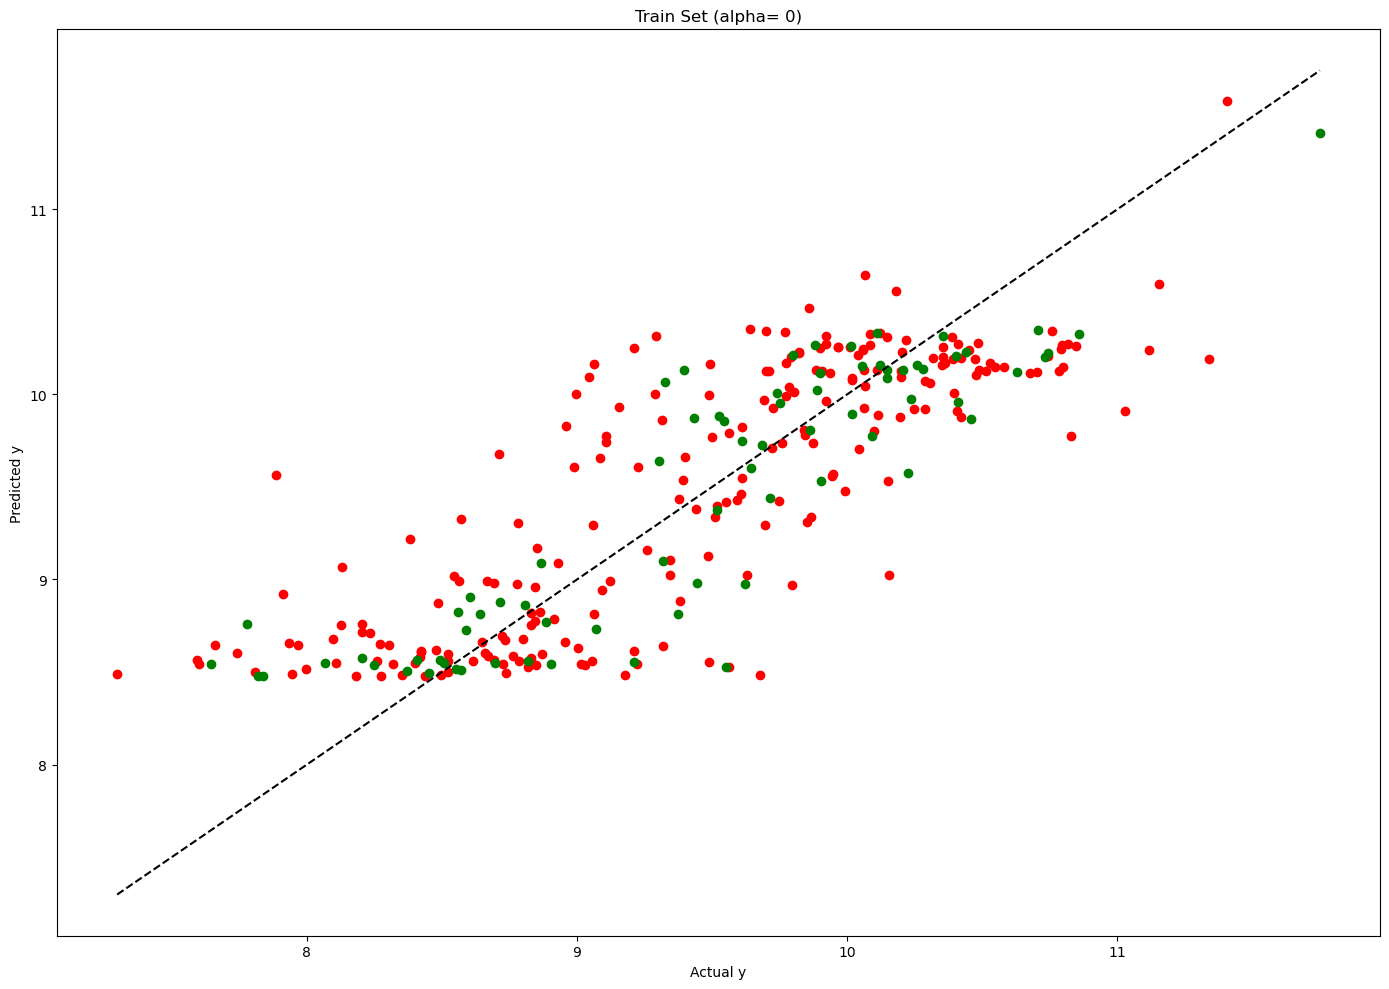

In [28]:
plt.figure(figsize=(14, 10))
plt.scatter(y_train, pipeline.predict(X_train), color='red', label='Train')
plt.scatter(y_test, pipeline.predict(X_test), color='green', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title(f'Train Set (alpha= 0)')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.tight_layout()
plt.show()

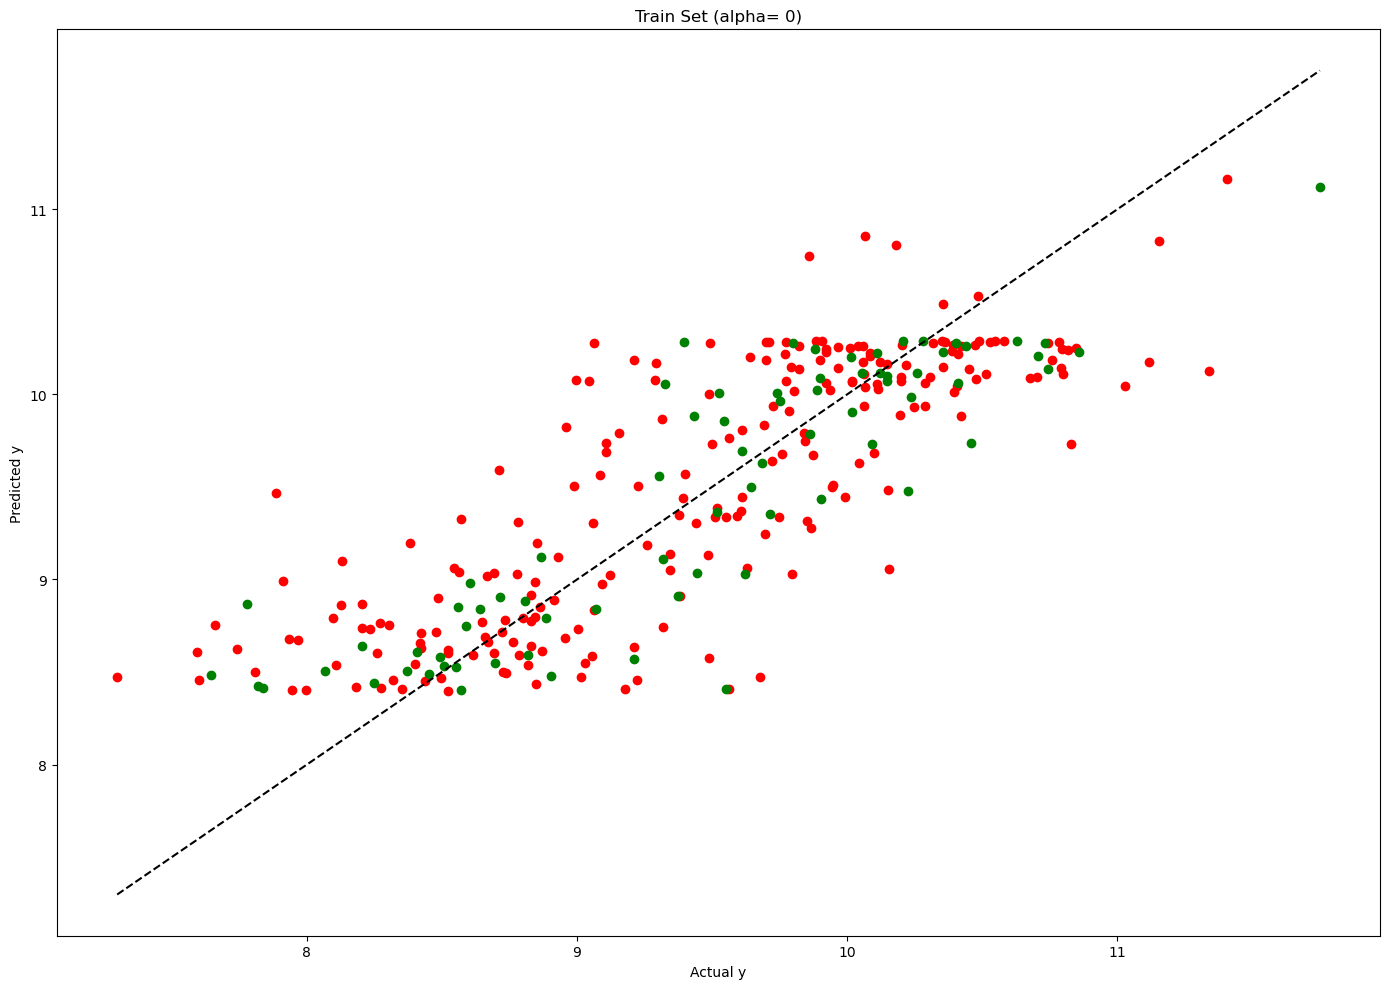

In [29]:
plt.figure(figsize=(14, 10))
plt.scatter(y_train, pipeline2.predict(X_train), color='red', label='Train')
plt.scatter(y_test, pipeline2.predict(X_test), color='green', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title(f'Train Set (alpha= 0)')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.tight_layout()
plt.show()

<h1>Вывод к задаче 1: был реализован собственный класс линейной регрессии с возможностью настройки регуляризации данных. Были реализованы собсвтенные функции метрик, функции разбиения данных на обучающие и валидационныце, а также функции отложенной выборки и кросс-валидации. В результаты испытания двух моеделей, с параметрами регуляризации равными 0 и 0.01 соотвественно, можно прийти к выводу, что модель с регуляризацией приводит к лучшим результатам, что можно наблюдать на метриках. <h1>

<h1> Задача 2 - Классификация и кросс-валидация <h1>

In [30]:
# Вариант 1

df = pd.read_csv("Cl_A5_V1.csv")
df

,X1,X2,y
0,-0.192831,-0.489801,1.0
1,-0.776832,-0.221889,0.0
2,0.244302,0.309428,1.0
3,0.599050,-0.505053,1.0
4,1.124836,1.015005,0.0
...,...,...,...
495,1.605533,-0.496518,1.0
496,-0.154001,1.304373,0.0
497,0.268219,0.035547,1.0
498,2.014305,0.327108,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   y       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [32]:
df.describe()

,X1,X2,y
count,500.000000,500.000000,500.000000
mean,0.480231,0.241647,0.500000
std,0.913938,0.596719,0.500501
min,-1.521055,-1.095907,0.000000
25%,-0.187124,-0.221222,0.000000
50%,0.483572,0.269418,0.500000
75%,1.137413,0.699309,1.000000
max,2.611756,1.632622,1.000000


In [33]:
X = df.drop("y", axis = 1)
y = df["y"]

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
params = {
    'penalty': 'l2',
    'fit_intercept': True,
    'max_iter': 100,
    'C': 1e5,
    'solver': 'liblinear',
    'random_state': 12345
}

In [37]:
degrees = list(range(1,21))

In [38]:
# Подход с отложенной выборкой
def holdout_validation(X_train, y_train, X_test, y_test, degrees, params):
    
    '''
    Функция реализации валидации на отложенной выборке
    
    X_train:значения фичей обучающего массива
    y_train: значения таргета обучающего массива
    X_test: значения фичей валдиационного массива
    y_test: значения таргета валидационного массива
    degrees: степени полинома
    params: параметры для модели логистической регрессии
    '''
    
    train_accuracies = []
    test_accuracies = []
    best_degree = 0
    best_test_accuracy = 0

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model = LogisticRegression(**params)
        model.fit(X_train_poly, y_train)
        
        # Оценка на обучающем подмножестве
        y_train_pred = model.predict(X_train_poly)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Оценка на валидационном подмножестве
        y_test_pred = model.predict(X_test_poly)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_degree = degree

        print(f'Degree: {degree}, Train Accuracy: {train_accuracy}, Validation Accuracy: {test_accuracy}')
    
    return best_degree, train_accuracies, test_accuracies

best_degree_holdout, train_accuracies_holdout, val_accuracies_holdout = holdout_validation(
    X_train, y_train, X_test, y_test, degrees, params
)

Degree: 1, Train Accuracy: 0.8457142857142858, Validation Accuracy: 0.82
Degree: 2, Train Accuracy: 0.8485714285714285, Validation Accuracy: 0.8333333333333334
Degree: 3, Train Accuracy: 0.9142857142857143, Validation Accuracy: 0.9066666666666666
Degree: 4, Train Accuracy: 0.9228571428571428, Validation Accuracy: 0.9066666666666666
Degree: 5, Train Accuracy: 0.9228571428571428, Validation Accuracy: 0.9133333333333333
Degree: 6, Train Accuracy: 0.9228571428571428, Validation Accuracy: 0.9066666666666666
Degree: 7, Train Accuracy: 0.9285714285714286, Validation Accuracy: 0.9066666666666666
Degree: 8, Train Accuracy: 0.9285714285714286, Validation Accuracy: 0.9066666666666666
Degree: 9, Train Accuracy: 0.9314285714285714, Validation Accuracy: 0.92
Degree: 10, Train Accuracy: 0.9142857142857143, Validation Accuracy: 0.92
Degree: 11, Train Accuracy: 0.9142857142857143, Validation Accuracy: 0.9066666666666666
Degree: 12, Train Accuracy: 0.9, Validation Accuracy: 0.8866666666666667
Degree: 13

C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Degree: 17, Train Accuracy: 0.7971428571428572, Validation Accuracy: 0.74
Degree: 18, Train Accuracy: 0.7771428571428571, Validation Accuracy: 0.7333333333333333
Degree: 19, Train Accuracy: 0.7742857142857142, Validation Accuracy: 0.7266666666666667
Degree: 20, Train Accuracy: 0.7657142857142857, Validation Accuracy: 0.7266666666666667


In [39]:
# Подход с кросс-валидацией
def cross_val_validation(X_train, y_train, degrees, log_reg_params, cv=4):
    
    '''
    Функция реализации валидации на отложенной выборке
    
    X_train:значения фичей обучающего массива
    y_train: значения таргета обучающего массива
    degrees: степени полинома
    log_reg_params: параметры для модели логистической регрессии
    cv: количество fold'ов для кросс валидации
    '''
    
    train_accuracies = []
    test_accuracies = []
    best_degree = 0
    best_test_accuracy = 0

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        
        model = LogisticRegression(**log_reg_params)
        
        # Кросс-валидация
        cv_results = cross_validate(model, X_train_poly, y_train, cv=cv, scoring='accuracy', return_train_score=True)
        train_accuracy = np.mean(cv_results['train_score'])
        test_accuracy = np.mean(cv_results['test_score'])
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_degree = degree

        print(f'Degree: {degree}, Train Accuracy: {train_accuracy}, Validation Accuracy: {test_accuracy}')
    
    return best_degree, train_accuracies, test_accuracies

best_degree_cv, train_accuracies_cv, val_accuracies_cv = cross_val_validation(
    X_train, y_train, degrees, params
)

Degree: 1, Train Accuracy: 0.8466715525498506, Validation Accuracy: 0.8457745559038662
Degree: 2, Train Accuracy: 0.8514425449162627, Validation Accuracy: 0.8401253918495297
Degree: 3, Train Accuracy: 0.9171625112472064, Validation Accuracy: 0.9086010971786833
Degree: 4, Train Accuracy: 0.9257321568513627, Validation Accuracy: 0.9028213166144201
Degree: 5, Train Accuracy: 0.9304850085623892, Validation Accuracy: 0.9057601880877744
Degree: 6, Train Accuracy: 0.9304850085623892, Validation Accuracy: 0.9029192789968652
Degree: 7, Train Accuracy: 0.940001596377674, Validation Accuracy: 0.8972048066875653
Degree: 8, Train Accuracy: 0.9352414884044931, Validation Accuracy: 0.8999804075235109
Degree: 9, Train Accuracy: 0.9323897773778771, Validation Accuracy: 0.8885514629049112


C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Li

Degree: 10, Train Accuracy: 0.918094940934026, Validation Accuracy: 0.8828369905956113
Degree: 11, Train Accuracy: 0.9161901721185384, Validation Accuracy: 0.8829022988505747
Degree: 12, Train Accuracy: 0.9123806344875627, Validation Accuracy: 0.8715386624869383
Degree: 13, Train Accuracy: 0.9066626999100222, Validation Accuracy: 0.8886167711598746
Degree: 14, Train Accuracy: 0.8581146779670856, Validation Accuracy: 0.8429336468129571
Degree: 15, Train Accuracy: 0.8571641076248804, Validation Accuracy: 0.8314720480668757
Degree: 16, Train Accuracy: 0.8123748294778393, Validation Accuracy: 0.8058385579937304


C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vboro\.conda\envs\py310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Degree: 17, Train Accuracy: 0.8209662438684585, Validation Accuracy: 0.7944422675026123
Degree: 18, Train Accuracy: 0.7838032972455229, Validation Accuracy: 0.7916013584117032
Degree: 19, Train Accuracy: 0.7800046440077788, Validation Accuracy: 0.7858542319749217
Degree: 20, Train Accuracy: 0.7437886395959713, Validation Accuracy: 0.75457157784744


In [40]:
# Оценка на тестовом подмножестве для наилучшего случая (holdout)
poly = PolynomialFeatures(best_degree_holdout)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(**params)
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
test_accuracy_holdout = accuracy_score(y_test, y_test_pred)

print(f'Best Degree (Holdout): {best_degree_holdout}, Test Accuracy (Holdout): {test_accuracy_holdout}')

Best Degree (Holdout): 9, Test Accuracy (Holdout): 0.92


In [41]:
# Оценка на тестовом подмножестве для наилучшего случая (cross-validation)
poly = PolynomialFeatures(best_degree_cv)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(**params)
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
test_accuracy_cv = accuracy_score(y_test, y_test_pred)
print(f'Best Degree (Cross-Validation): {best_degree_cv}, Test Accuracy (Cross-Validation): {test_accuracy_cv}')

Best Degree (Cross-Validation): 3, Test Accuracy (Cross-Validation): 0.9066666666666666


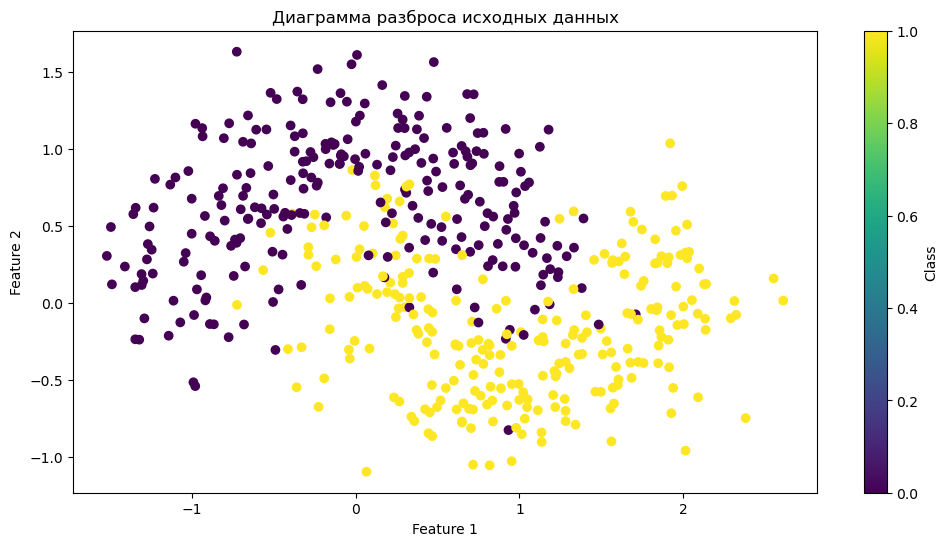

In [42]:
# Диаграмма разброса исходных данных
plt.figure(figsize=(12, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Диаграмма разброса исходных данных')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

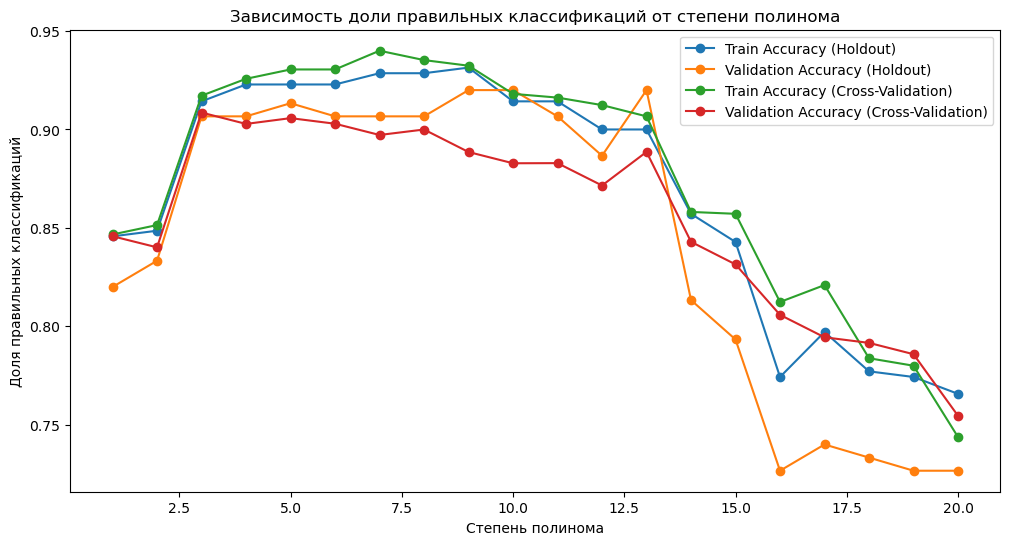

In [43]:
# Зависимость доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств (holdout и cross-validation)
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_accuracies_holdout, label='Train Accuracy (Holdout)', marker='o')
plt.plot(degrees, val_accuracies_holdout, label='Validation Accuracy (Holdout)', marker='o')
plt.plot(degrees, train_accuracies_cv, label='Train Accuracy (Cross-Validation)', marker='o')
plt.plot(degrees, val_accuracies_cv, label='Validation Accuracy (Cross-Validation)', marker='o')
plt.title('Зависимость доли правильных классификаций от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('Доля правильных классификаций')
plt.legend()
plt.show()

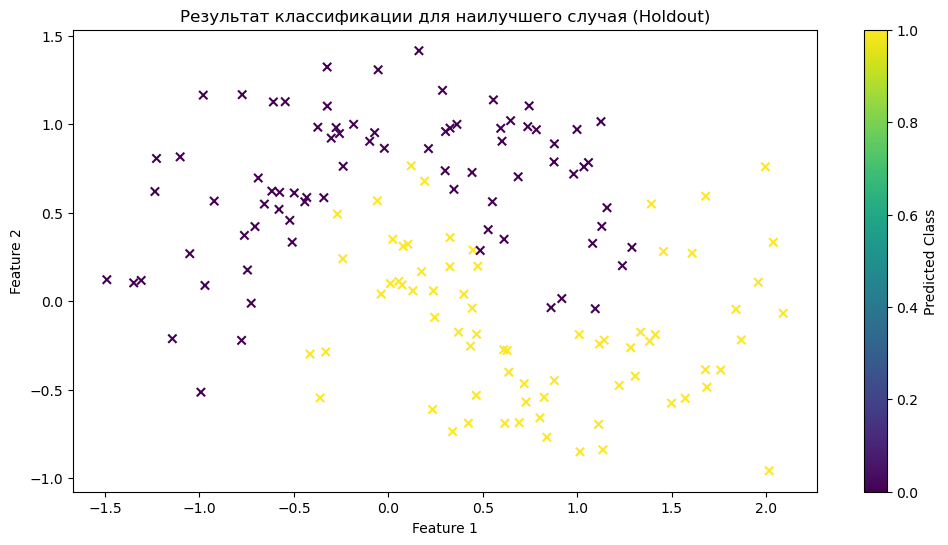

In [44]:
# Результат классификации для наилучшего случая (holdout)
poly = PolynomialFeatures(best_degree_holdout)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(**params)
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test_pred, cmap='viridis', marker='x')
plt.title('Результат классификации для наилучшего случая (Holdout)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Class')
plt.show()

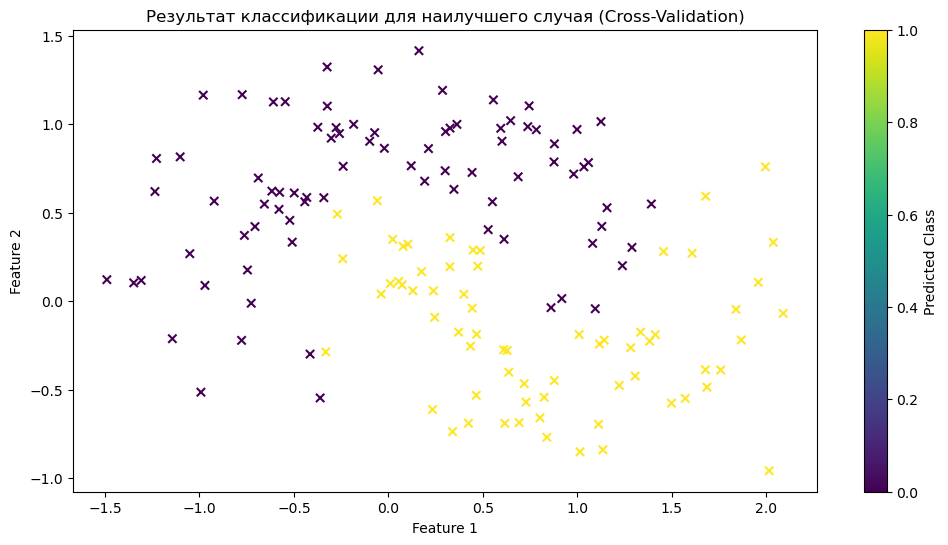

In [45]:
# Результат классификации для наилучшего случая (cross-validation)
poly = PolynomialFeatures(best_degree_cv)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(**params)
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test_pred, cmap='viridis', marker='x')
plt.title('Результат классификации для наилучшего случая (Cross-Validation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Class')
plt.show()

<h1> Вывод для задачи 2: была прорведена классификация с помощью модели логистической регрессии для данного набора данных. Для поиска полинома с минимальной ошибкой были использованы методы с отложенной выборкой и кросс-валидацией. В случае отложенной выборки значение полинома равно 9. В случае кросс-валидации значение полинома равно 3.<h1>

<h1> Задача 3 : Классификация текстовых документов<h1>

In [46]:
# вариант 2

In [47]:
df = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)

In [48]:
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [49]:
df[0].value_counts()

0
ham     4825
spam     747
Name: count, dtype: int64

In [50]:
import re
# удаление ненужных символов(знаков препинания и тд)
df[1] = df[1].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [51]:
df[1]

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will  b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: 1, Length: 5572, dtype: object

In [52]:
from sklearn.preprocessing import LabelEncoder
#преобразуем ham/spam в 0/1 соответственно
le = LabelEncoder()

df[0] = le.fit_transform(df[0])

In [53]:
df[0].value_counts()

0
0    4825
1     747
Name: count, dtype: int64

In [54]:
df.columns = ['y', 'X']

In [55]:
X = df['X']
y = df['y']
X = [x.lower() for x in X]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [57]:
#X_train

In [58]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

from tfIdfInheritVectorizer.feature_extraction.vectorizer import TfidfVectorizer

from time import time

In [59]:
tfidfvectorizer = TfidfVectorizer()

In [60]:
#X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
#X_test_tfidf = tfidfvectorizer.fit_transform(X_test)

In [61]:
models = {
    'knn': KNeighborsClassifier,
    'lr':  LogisticRegression,
    'np_br': BernoulliNB,
    'np_mn': MultinomialNB
}

In [62]:
def create_pipeline(classifier, ngram, **kwargs):
    '''
    Функция создания pipeline'а.
    
    classifier: тип модели
    ngram: значения параметра ngram
    '''
    return Pipeline([
        ('vectorizer', TfidfVectorizer(ngram_range = ngram)),
        ('classifier', classifier(**kwargs))
    ]) 

In [68]:
pipeline_knn = create_pipeline(KNeighborsClassifier, (1,1))

pipeline_lr = create_pipeline(LogisticRegression, (1,1))

pipeline_np_br = create_pipeline(BernoulliNB, (1,1))
TfidfVectorizer(ngram_range = ngram)),


MultinomialNB.fit()

pipeline_np_mn = create_pipeline(MultinomialNB, (1,1))
pipeline_np_mn

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [64]:
params = {
    'knn' : {'classifier__n_neighbors' : np.arange(1, 150, 20)},
    'lr'  : {'classifier__C': np.logspace(-2, 10, 8, base = 10)},
    'np_br':{'classifier__alpha': np.logspace(-4, 1, 8, base = 10)},
    'np_mn':{'classifier__alpha': np.logspace(-4, 1, 8, base = 10)}
}

In [65]:
params['knn']

{'classifier__n_neighbors': array([  1,  21,  41,  61,  81, 101, 121, 141])}

In [66]:
def get_results(models, params, ngram):
    
    '''
    Функция обучения и тестирования моделей.
    
    models: словарь моделей
    params: словарь параметров моделей
    ngram: значение параметра ngram
    '''
    
    results = []
    
    for model, parameter in params.items():
        pipeline = create_pipeline(models[model], ngram)
        
        # обучение
        start_time = time()
        
        grid_search = GridSearchCV(pipeline, parameter, cv = StratifiedKFold(n_splits = 4), scoring = 'balanced_accuracy', return_train_score = True)
        
        grid_search.fit(X_train, y_train)
        
        end_time = time()
        train_time = end_time - start_time
        
        # предсказание
        start_time = time()
        
        y_pred_train = grid_search.predict(X_train)
        y_pred_test = grid_search.predict(X_test)
        
        end_time = time()
        prediction_time = end_time - start_time
        
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        
        results.append({
            'model' : model,
            'best_params' : grid_search.best_params_,
            'best_score' : grid_search.best_score_,
            'train_time' : train_time,
            'prediction_time' : prediction_time,
            'precision' : precision,
            'recall' : recall,
            'f1' : f1,
            'realization': grid_search
        })
        
    return results

In [67]:
res_nparam1 = get_results(models, params, (1,1))

KeyboardInterrupt: 

In [ ]:
resulting_grid_models = []
for result in res_nparam1:
    model = result['model']
    best_params = result['best_params']
    best_score = result['best_score']
    train_time = result['train_time']
    prediction_time = result['prediction_time']
    precision = result['precision']
    recall = result['recall']
    f1 = result['f1']
    resulting_grid_models.append(result['realization'])
    print(f'Model: {model}')
    print(f'Best parameters: {best_params}')
    print(f'Best balanced accuracy score: {best_score}')
    print(f'Training time: {train_time}')
    print(f'Prediction time: {prediction_time}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print()

In [ ]:
def extract_param_name(param_str):
    '''
    Удаление слова "classifier" перед именем параметра
    
    param_str: строка со значением параметра
    '''
    return param_str.split('__')[1]

def plot_model_perfomance(resulting_grid_model, model_name):
    
    '''
    Отрисовка кривых обучения и валдиации
    
    resulting_grid_model: результаты обучения и тестирования моделей
    model_name: имя модели
    '''
    
    plt.figure(figsize=(12,8))
    train_scores_mean = resulting_grid_model.cv_results_['mean_train_score']
    test_scores_mean = resulting_grid_model.cv_results_['mean_test_score']
    
    plt.title(f"Balanced accuracy for {model_name}")
    plt.xlabel("Parameter set")
    plt.ylabel("Balanced accuracy")
    
    param_values = [extract_param_name(str(params)) for params in resulting_grid_model.cv_results_['params']]
    x = np.arange(len(param_values))
    
    plt.plot(x, train_scores_mean, label = 'Train Balanced accuracy', marker = "s")
    plt.plot(x, test_scores_mean, label = 'Test Balanced accuracy', marker = "o")
    
    plt.xticks(x, param_values, rotation = 45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_model_perfomance(resulting_grid_models[0], "KNeighnours")

In [ ]:
plot_model_perfomance(resulting_grid_models[1], "Logistic Regression|")

In [ ]:
plot_model_perfomance(resulting_grid_models[2], "Bernoulli")

In [ ]:
plot_model_perfomance(resulting_grid_models[3], "Multinomial")

<h1> Повторим эти же пункты для ngram = 2, ngram = (1,2) <h1>

In [ ]:
#ngram = (1,2)
res_nparam12 = get_results(models, params, (1,2))

In [ ]:
resulting_grid_models_12 = []
for result in res_nparam12:
    model = result['model']
    best_params = result['best_params']
    best_score = result['best_score']
    train_time = result['train_time']
    prediction_time = result['prediction_time']
    precision = result['precision']
    recall = result['recall']
    f1 = result['f1']
    resulting_grid_models_12.append(result['realization'])
    print(f'Model: {model}')
    print(f'Best parameters: {best_params}')
    print(f'Best balanced accuracy score: {best_score}')
    print(f'Training time: {train_time}')
    print(f'Prediction time: {prediction_time}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print()

In [ ]:
plot_model_perfomance(resulting_grid_models_12[0], "KNeighnours")

In [ ]:
plot_model_perfomance(resulting_grid_models_12[1], "Logistic regression")

In [ ]:
plot_model_perfomance(resulting_grid_models_12[2], "Bernoulli")

In [ ]:
plot_model_perfomance(resulting_grid_models_12[3], "Multinomial")

In [ ]:
# ngram = (2,2)
res_nparam22 = get_results(models, params, (2,2))

In [ ]:
resulting_grid_models_22 = []
for result in res_nparam22:
    model = result['model']
    best_params = result['best_params']
    best_score = result['best_score']
    train_time = result['train_time']
    prediction_time = result['prediction_time']
    precision = result['precision']
    recall = result['recall']
    f1 = result['f1']
    resulting_grid_models_22.append(result['realization'])
    print(f'Model: {model}')
    print(f'Best parameters: {best_params}')
    print(f'Best balanced accuracy score: {best_score}')
    print(f'Training time: {train_time}')
    print(f'Prediction time: {prediction_time}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print()

In [ ]:
plot_model_perfomance(resulting_grid_models_22[0], "KNeighnours")

In [ ]:
plot_model_perfomance(resulting_grid_models_22[1], "Logistic regression")

In [ ]:
plot_model_perfomance(resulting_grid_models_22[2], "Bernoulli")

In [ ]:
plot_model_perfomance(resulting_grid_models_22[3], "Multinomial")

In [ ]:
result_table = pd.DataFrame(columns = ["classifier", "n-gram", "best_parameters", "train_time", 
                                  "test_time", "balanced_accuracy", "Precision", "Recall", "f1"],)
result_table

In [ ]:
def fill_table(df, results, ngram):
    
    '''
    Функция заполнения таблицы с результатами.
    
    df: таблица
    results: результаты
    ngram: значение параметра ngram
    '''
    
    for i in range(len(results)):
        temp_row = pd.DataFrame({"classifier": results[i]['model'], "n-gram" : ngram, 
                                 "best_parameters": results[i]['best_params'], 
                                 "train_time": results[i]['train_time'], 
                                 "test_time" : results[i]['prediction_time'], 
                                 "balanced_accuracy": results[i]['best_score'], 
                                 "Precision": results[i]['precision'], 
                                 "Recall": results[i]['recall'], 
                                 "f1" : results[i]['f1']})
        #df = df.append(temp_row, ignore_index = True)
        df = pd.concat([df, temp_row], ignore_index=True)
    return df

In [ ]:
result_table = fill_table(result_table, res_nparam1, "(1,1)")

In [ ]:
result_table = fill_table(result_table, res_nparam12, "(1,2)")

In [ ]:
result_table = fill_table(result_table, res_nparam22, "(2,2)")

In [ ]:
result_table

<h1> Вывод к задаче 3: KNeighbours - обучается медленнее всех и показывает плохие результаты. Не подходит для данной задачи.<h1>

<h1> Logistic regression - обучается медленне двух остальных методов, но при значениях параметра ngram - (1,1) (1,2) показывает лучший показатель best_accuracy, но все еще уступает по метрике f1 остальным двум методам, о которых далее. Хорошо интерпритируема<h1>

<h1> Немного про метрики: в данной задаче самой важной метрикой будет являться Precision, потому что если модель не пометит сообщение как спам, то пользователь сможет сам его отличить когда увидит. Но если модель пометит как спам человеческое сообщение, то пользователь уже скорее всего его никогда не найдет, или ему придется рыться в папках с удаленными сообщениями.<h1>

<h1> Модель Бернулли -  модель показала лучшие значения параметра Precision и обучалась так же быстро, как и мультиномиальная модель. Как и мультиномиальная модель, чувствительна к масштабу признаков. Является лучшей моделью для данной задачи.<h1>

<h1> Мультиномиальная модель - самая быстро обучаемая. В метрике Precision чуть уступает модели Бернулли, но в остальных ее обгоняет.<h1>